In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

In [2]:
'''
Checking the policies and q-values of the learned models for dropout=0.8 and epoch60
'''
data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts20000-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
initialq = data51['qvals'][:,0]
opts = data61['opts']
qfuncs = data61['qs'][:,0,:,:]

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass

 0: score 0.750 initialq 3.46 opt [[2 1 1 3 3 0]]
  step 0 qfunc [ 2.24 2.53 3.41 2.27 ]
  step 1 qfunc [ 2.33 3.44 2.34 2.38 ]
  step 2 qfunc [ 2.54 3.46 2.42 2.52 ]
  step 3 qfunc [ 2.79 3.15 2.44 3.50 ]
  step 4 qfunc [ 3.51 3.45 2.45 3.51 ]
  step 5 qfunc [ 3.52 3.31 3.52 3.51 ]
 1: score 0.500 initialq 3.45 opt [[1 1 3 2 1 0]]
  step 0 qfunc [ 2.25 3.39 2.33 2.24 ]
  step 1 qfunc [ 2.46 3.43 2.62 2.50 ]
  step 2 qfunc [ 2.69 2.82 2.69 3.48 ]
  step 3 qfunc [ 3.38 3.28 3.50 3.47 ]
  step 4 qfunc [ 3.51 3.51 3.49 3.50 ]
  step 5 qfunc [ 3.52 3.52 3.52 3.21 ]
 2: score 0.539 initialq 3.45 opt [[1 1 3 2 1 0]]
  step 0 qfunc [ 2.20 3.38 2.41 2.19 ]
  step 1 qfunc [ 2.27 3.42 2.61 2.40 ]
  step 2 qfunc [ 2.57 2.69 2.54 3.47 ]
  step 3 qfunc [ 3.27 3.35 3.49 3.23 ]
  step 4 qfunc [ 3.48 3.50 3.00 3.46 ]
  step 5 qfunc [ 3.52 3.45 3.51 3.29 ]
 3: score 0.500 initialq 3.44 opt [[1 1 3 2 0 0]]
  step 0 qfunc [ 2.24 3.37 2.29 2.23 ]
  step 1 qfunc [ 2.40 3.42 2.48 2.39 ]
  step 2 qfunc [ 2.3

In [24]:
'''
Let's look for the cases where the policy is correct until the last step, and the last step is wrong.
And good models.
'''
good_ix = [10,13,26,27] # last steps end up being 2
final3 = [7,12,19,20,22,23] # last step should've been 3
final2 = [0,29] # last step should've been 2
# now we can do a preliminary robust matrix evaluation for the good models and the last step should be 2 models
model_ixs = np.concatenate([good_ix, final2])
six.print_(model_ixs)
rmat = np.zeros((model_ixs.shape[0],model_ixs.shape[0]))
# rmat[rmodel,cmodel] = the value of rmodel's policy in cmodel
for pix in six.moves.range(model_ixs.shape[0]):
    policy = sorted_opts[model_ixs[pix],0,:]
    last_act = policy[-1]
    six.print_(last_act)
    for eix in six.moves.range(model_ixs.shape[0]):
        # qfunc of last step
        last_q = sorted_qfuncs[model_ixs[eix],-1,:]
        #six.print_(last_q)
        rmat[pix,eix] = last_q[last_act]
six.print_(rmat)
#six.print_(np.min(rmat,axis=0))
six.print_(np.min(rmat,axis=1)[:,np.newaxis])

[10 13 26 27  0 29]
2
2
2
2
0
0
[[ 3.46448722  3.5056317   3.51720442  3.39157984  3.51887841  2.82469152]
 [ 3.46448722  3.5056317   3.51720442  3.39157984  3.51887841  2.82469152]
 [ 3.46448722  3.5056317   3.51720442  3.39157984  3.51887841  2.82469152]
 [ 3.46448722  3.5056317   3.51720442  3.39157984  3.51887841  2.82469152]
 [ 2.57431363  2.64013803  2.73524159  2.71147496  3.52054915  3.43583114]
 [ 2.57431363  2.64013803  2.73524159  2.71147496  3.52054915  3.43583114]]
[[ 2.82469152]
 [ 2.82469152]
 [ 2.82469152]
 [ 2.82469152]
 [ 2.57431363]
 [ 2.57431363]]


In [35]:
'''
Checking the policies and q-values of the learned models for dropout=1.0 and epoch13
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runB.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts']])
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:]])

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_score_ix = np.arange(0,100)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass


 0: score 0.500 initialq 3.97 opt [[1 2 1 3 0 0]]
  step 0 qfunc [ 2.47 3.91 3.15 2.86 ]
  step 1 qfunc [ 3.12 3.50 3.95 2.97 ]
  step 2 qfunc [ 3.23 3.96 3.22 3.07 ]
  step 3 qfunc [ 3.94 3.94 3.94 3.99 ]
  step 4 qfunc [ 3.99 3.99 3.99 3.99 ]
  step 5 qfunc [ 3.99 3.99 3.99 3.99 ]
 1: score 0.755 initialq 3.96 opt [[2 1 3 1 3 3]]
  step 0 qfunc [ 2.74 3.14 3.92 2.54 ]
  step 1 qfunc [ 2.72 3.94 2.77 2.57 ]
  step 2 qfunc [ 3.19 3.95 3.07 3.95 ]
  step 3 qfunc [ 3.11 3.97 2.92 2.96 ]
  step 4 qfunc [ 3.97 3.96 3.30 3.98 ]
  step 5 qfunc [ 3.98 3.98 3.99 3.99 ]
 2: score 0.750 initialq 3.96 opt [[1 2 3 1 3 2]]
  step 0 qfunc [ 2.67 3.89 2.96 2.83 ]
  step 1 qfunc [ 3.16 3.35 3.94 3.09 ]
  step 2 qfunc [ 3.10 3.83 2.99 3.96 ]
  step 3 qfunc [ 2.91 3.97 2.99 2.95 ]
  step 4 qfunc [ 3.97 3.88 3.00 3.98 ]
  step 5 qfunc [ 3.99 3.97 3.99 3.97 ]
 3: score 0.953 initialq 3.96 opt [[1 2 1 3 2 3]]
  step 0 qfunc [ 2.62 3.89 2.94 2.72 ]
  step 1 qfunc [ 2.91 3.34 3.93 2.80 ]
  step 2 qfunc [ 3.2

In [36]:
'''
Let's look for the cases where the policy is correct until the last step, and the last step is wrong.
And good models.
'''
good2 = [5,13,34,46,62,84] # last steps end up being 2
good3 = [3,7,14,26,47,50,63,75] # last steps end up being 3
final2 = [4,11,16,17,20,29,33,39,43,52,55,66,67,93] # last step should've been 2
final3 = [6] # last step should've been 3

# now we can do a preliminary robust matrix evaluation for the good models and the last step should be 2 models
model_ixs = np.concatenate([good2, final2])
six.print_(model_ixs)
rmat = np.zeros((model_ixs.shape[0],model_ixs.shape[0]))
# rmat[rmodel,cmodel] = the value of rmodel's policy in cmodel
for pix in six.moves.range(model_ixs.shape[0]):
    policy = sorted_opts[model_ixs[pix],0,:]
    last_act = policy[-1]
    #six.print_(last_act)
    for eix in six.moves.range(model_ixs.shape[0]):
        # qfunc of last step
        last_q = sorted_qfuncs[model_ixs[eix],-1,:]
        #six.print_(last_q)
        rmat[pix,eix] = last_q[last_act]
six.print_(rmat)
six.print_(np.mean(rmat,axis=1))
six.print_(np.min(rmat,axis=1))

[ 5 13 34 46 62 84  4 11 16 17 20 29 33 39 43 52 55 66 67 93]
[[ 3.98837483  3.98672328  3.98188117  3.98886294  3.97772018  3.9653923
   3.98727488  3.98806248  3.98553694  3.98821222  3.98721899  3.90402416
   3.97742461  3.97498535  3.98551816  3.97761134  3.95061849  3.97987959
   3.92001373  3.95773623]
 [ 3.98837483  3.98672328  3.98188117  3.98886294  3.97772018  3.9653923
   3.98727488  3.98806248  3.98553694  3.98821222  3.98721899  3.90402416
   3.97742461  3.97498535  3.98551816  3.97761134  3.95061849  3.97987959
   3.92001373  3.95773623]
 [ 3.98837483  3.98672328  3.98188117  3.98886294  3.97772018  3.9653923
   3.98727488  3.98806248  3.98553694  3.98821222  3.98721899  3.90402416
   3.97742461  3.97498535  3.98551816  3.97761134  3.95061849  3.97987959
   3.92001373  3.95773623]
 [ 3.98837483  3.98672328  3.98188117  3.98886294  3.97772018  3.9653923
   3.98727488  3.98806248  3.98553694  3.98821222  3.98721899  3.90402416
   3.97742461  3.97498535  3.98551816  3.977611

In [37]:
'''
Checking the policies and q-values of the learned models for dropout=0.8 and epoch23
'''
data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runC.npz')
data13 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runD.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runC.npz')
data23 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real1-runD.npz')

data31 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runA.npz')
data32 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runC.npz')
data33 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real0-runD.npz')

data41 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runA.npz')
data42 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runC.npz')
data43 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runD.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runC.npz')
data53 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runD.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runC.npz')
data63 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runD.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss'],data13['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0],data23['scores'][:,0]])
#trueqvals = np.concatenate([data21['qvals'][:,0],data22['qvals'][:,0],data23['qvals'][:,0]])
#falseqvals = np.concatenate([data31['qvals'][:,0],data32['qvals'][:,0],data33['qvals'][:,0]])
rewards = np.concatenate([data41['rewards'][:,0],data42['rewards'][:,0],data43['rewards'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0],data53['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts'],data63['opts']])
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:],data63['qs'][:,0,:,:]])

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass

 0: score 0.750 initialq 3.43 opt [[1 1 3 3 2 0]]
  step 0 qfunc [ 2.16 3.27 2.27 2.16 ]
  step 1 qfunc [ 2.36 3.37 2.37 2.37 ]
  step 2 qfunc [ 2.43 2.71 2.41 3.49 ]
  step 3 qfunc [ 3.01 2.89 2.89 3.51 ]
  step 4 qfunc [ 3.36 3.40 3.52 2.62 ]
  step 5 qfunc [ 3.54 3.46 3.53 3.13 ]
 1: score 0.750 initialq 3.40 opt [[2 1 1 3 3 0]]
  step 0 qfunc [ 2.26 2.61 3.31 2.29 ]
  step 1 qfunc [ 2.39 3.37 2.33 2.33 ]
  step 2 qfunc [ 2.58 3.40 2.58 2.65 ]
  step 3 qfunc [ 3.12 3.07 2.77 3.44 ]
  step 4 qfunc [ 3.44 3.41 2.76 3.45 ]
  step 5 qfunc [ 3.46 3.44 3.27 3.45 ]
 2: score 0.750 initialq 3.39 opt [[2 1 1 1 3 2]]
  step 0 qfunc [ 2.23 2.49 3.27 2.21 ]
  step 1 qfunc [ 2.35 3.34 2.29 2.41 ]
  step 2 qfunc [ 2.66 3.37 2.54 2.68 ]
  step 3 qfunc [ 3.05 3.42 2.59 3.25 ]
  step 4 qfunc [ 3.06 3.15 2.61 3.45 ]
  step 5 qfunc [ 3.45 3.19 3.46 3.27 ]
 3: score 0.753 initialq 3.37 opt [[1 1 3 2 3 0]]
  step 0 qfunc [ 2.28 3.20 2.38 2.23 ]
  step 1 qfunc [ 2.41 3.30 2.56 2.39 ]
  step 2 qfunc [ 2.4

In [39]:
'''
Let's look for the cases where the policy is correct until the last step, and the last step is wrong.
And good models.
'''
good2 = [5,6,8,9,10,11,12,13,14,15,17,18,20,21,22,23,24,26,27,29,30,31,33,35,36,40,43,44,46,61,66,67,77,97] # last steps end up being 2
good3 = [4,89] # last steps end up being 3
final2 = [0,1,3,7,16,25,38,39,41,47,49,50,52,58,62,64,70,71,75,98] # last step should've been 2
final3 = [] # last step should've been 3

six.print_(len(good2))
six.print_(len(final2))

# now we can do a preliminary robust matrix evaluation for the good models and the last step should be 2 models
model_ixs = np.concatenate([good2, final2])
six.print_(model_ixs)
rmat = np.zeros((model_ixs.shape[0],model_ixs.shape[0]))
# rmat[rmodel,cmodel] = the value of rmodel's policy in cmodel
for pix in six.moves.range(model_ixs.shape[0]):
    policy = sorted_opts[model_ixs[pix],0,:]
    last_act = policy[-1]
    #six.print_(last_act)
    for eix in six.moves.range(model_ixs.shape[0]):
        # qfunc of last step
        last_q = sorted_qfuncs[model_ixs[eix],-1,:]
        #six.print_(last_q)
        rmat[pix,eix] = last_q[last_act]
#six.print_(rmat)
six.print_(np.mean(rmat,axis=1))
six.print_(np.min(rmat,axis=1))

34
20
[ 5  6  8  9 10 11 12 13 14 15 17 18 20 21 22 23 24 26 27 29 30 31 33 35 36
 40 43 44 46 61 66 67 77 97  0  1  3  7 16 25 38 39 41 47 49 50 52 58 62 64
 70 71 75 98]
[ 3.24421266  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266
  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266
  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266
  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266
  2.85016024  3.24421266  3.24421266  3.24421266  3.24421266  3.24421266
  3.24421266  3.24421266  3.24421266  3.24421266  3.0894189   3.0894189
  3.0894189   3.0894189   3.0894189   2.85016024  3.0894189   3.0894189
  2.85016024  2.90954679  2.85016024  3.0894189   2.85016024  3.0894189
  2.90954679  3.0894189   3.0894189   3.0894189   2.90954679  3.0894189 ]
[ 2.44229973  2.44229973  2.44229973  2.44229973  2.44229973  2.44229973
  2.44229973  2.44229973  2.44229973  2.44229973  2.44229973  2.44229973
  2.44229973  2.44229973  2

In [24]:
'''
Now let's look at the extended version with all 100 models for no dropout.
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runB.npz')

data71 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/rme-rtype1-trajectories500-runA.npz')
data72 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/rme-rtype1-trajectories500-runB.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts']])[:,0,:]
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:]])

# each row is a policy
evals = np.vstack([data71['evals'],data72['evals']]).T
#six.print_(evals)

eval_avg = np.mean(evals,axis=1)
sorted_avg_ix = np.flip(np.argsort(eval_avg), 0)

eval_min = np.min(evals,axis=1)
sorted_min_ix = np.flip(np.argsort(eval_min), 0)

eval_per = np.percentile(evals,0.25,axis=1)
sorted_per_ix = np.flip(np.argsort(eval_per), 0)

#six.print_(sorted_avg_ix)
#six.print_(sorted_min_ix)

for r in six.moves.range(evals.shape[0]):
    ix = sorted_per_ix[r]
    six.print_('model_ix {:2d}: policy {} score {:.3f} initialq {:.3f} eval_avg {:.3f} eval_min {:.3f} per {:.3f}'.format(
        ix, opts[ix,:], scores[ix], initialq[ix], eval_avg[ix], eval_min[ix], eval_per[ix]))



model_ix  9: policy [1 3 1 1 3 2] score 0.706 initialq 3.841 eval_avg 3.940 eval_min 3.776 per 3.782
model_ix 29: policy [1 3 1 1 3 2] score 0.500 initialq 3.935 eval_avg 3.940 eval_min 3.762 per 3.774
model_ix 60: policy [1 3 1 3 2 3] score 0.682 initialq 3.936 eval_avg 3.815 eval_min 2.993 per 3.009
model_ix  7: policy [1 2 3 1 3 2] score 0.750 initialq 3.949 eval_avg 3.454 eval_min 2.985 per 2.985
model_ix 20: policy [1 2 3 1 3 2] score 0.750 initialq 3.906 eval_avg 3.454 eval_min 2.984 per 2.984
model_ix 61: policy [1 2 3 1 3 2] score 0.714 initialq 3.922 eval_avg 3.454 eval_min 2.984 per 2.984
model_ix 26: policy [1 2 3 1 3 2] score 0.839 initialq 3.953 eval_avg 3.453 eval_min 2.982 per 2.983
model_ix 42: policy [1 2 3 1 3 2] score 0.750 initialq 3.963 eval_avg 3.454 eval_min 2.981 per 2.982
model_ix 84: policy [1 2 0 1 3 3] score 0.766 initialq 3.920 eval_avg 3.680 eval_min 2.912 per 2.922
model_ix 52: policy [1 2 0 1 3 3] score 0.773 initialq 3.956 eval_avg 3.679 eval_min 2.913 

In [28]:
'''
Now let's look at the extended version with all 100 models for with dropout.
'''
data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runC.npz')
data13 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runD.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runC.npz')
data23 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real1-runD.npz')

data31 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runA.npz')
data32 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runC.npz')
data33 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real0-runD.npz')

data41 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runA.npz')
data42 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runC.npz')
data43 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runD.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runC.npz')
data53 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runD.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runC.npz')
data63 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runD.npz')

data71 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/rme-rtype1-trajectories500-runA.npz')
data72 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/rme-rtype1-trajectories500-runC.npz')
data73 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/rme-rtype1-trajectories500-runD.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss'],data13['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0],data23['scores'][:,0]])
rewards = np.concatenate([data41['rewards'][:,0],data42['rewards'][:,0],data43['rewards'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0],data53['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts'],data63['opts']])[:,0,:]
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:],data63['qs'][:,0,:,:]])

# each row is a policy
evals = np.vstack([data71['evals'],data72['evals'],data73['evals']]).T
#six.print_(evals)

eval_avg = np.mean(evals,axis=1)
sorted_avg_ix = np.flip(np.argsort(eval_avg), 0)

eval_min = np.min(evals,axis=1)
sorted_min_ix = np.flip(np.argsort(eval_min), 0)

eval_per = np.percentile(evals,0.25,axis=1)
sorted_per_ix = np.flip(np.argsort(eval_per), 0)

#six.print_(sorted_avg_ix)
#six.print_(sorted_min_ix)

for r in six.moves.range(evals.shape[0]):
    ix = sorted_per_ix[r]
    six.print_('model_ix {:2d}: policy {} score {:.3f} initialq {:.3f} eval_avg {:.3f} eval_min {:.3f} per {:.3f}'.format(
        ix, opts[ix,:], scores[ix], initialq[ix], eval_avg[ix], eval_min[ix], eval_per[ix]))



model_ix 73: policy [1 2 1 1 3 2] score 0.853 initialq 2.653 eval_avg 2.752 eval_min 2.411 per 2.413
model_ix 71: policy [1 2 1 1 3 2] score 0.770 initialq 3.019 eval_avg 2.750 eval_min 2.411 per 2.412
model_ix 75: policy [1 2 1 1 2 1] score 0.750 initialq 2.544 eval_avg 2.511 eval_min 2.404 per 2.408
model_ix 52: policy [1 2 1 1 2 1] score 0.750 initialq 2.410 eval_avg 2.511 eval_min 2.403 per 2.408
model_ix 29: policy [2 1 1 1 3 2] score 0.794 initialq 3.015 eval_avg 2.730 eval_min 2.391 per 2.395
model_ix 85: policy [2 1 1 1 3 2] score 0.750 initialq 2.902 eval_avg 2.730 eval_min 2.389 per 2.392
model_ix 57: policy [2 1 1 1 3 2] score 0.750 initialq 3.389 eval_avg 2.730 eval_min 2.386 per 2.391
model_ix 95: policy [2 1 1 1 3 2] score 0.712 initialq 2.764 eval_avg 2.729 eval_min 2.381 per 2.387
model_ix 99: policy [1 1 1 3 3 2] score 0.500 initialq 2.840 eval_avg 2.902 eval_min 2.365 per 2.371
model_ix 46: policy [1 1 1 3 3 2] score 0.750 initialq 3.015 eval_avg 2.905 eval_min 2.365 

Initial models ordered by average eval (normalized): [16 19  4 23 14 13  1 26 34 15 20 12  2 38  5 18 36 25 28  7 35 32  6  8 24
 22  0 27 17 21 30  3 31 11 39 29 10 37 33  9]
Corresponding average evals: [ 0.97199326  0.97048718  0.96884563  0.94370891  0.94280578  0.93329766
  0.93306345  0.93205693  0.92177525  0.91790356  0.91190244  0.91176114
  0.91072734  0.90841993  0.90720764  0.90194236  0.90192156  0.89963918
  0.89870888  0.89561655  0.89306879  0.8910653   0.87720681  0.87638965
  0.87149877  0.87110995  0.86475839  0.83913973  0.83487522  0.81697656
  0.81488811  0.80385715  0.80328164  0.80012653  0.79659556  0.79556427
  0.79361316  0.78121458  0.78001273  0.67641271]
Initial matrix limited to the top 6 models
Normalized:
policy model_ix 16: score 0.977 behavior 0.012805 [ 0.97692005  0.96516786  1.01574539  0.99916927  1.0128447   0.95703695]
policy model_ix 19: score 0.750 behavior 0.016866 [ 0.97643041  0.98842572  1.01397261  0.99399241  1.02110679  0.97539216]
poli

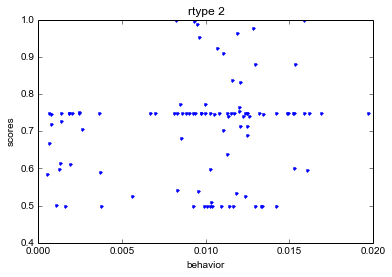

In [2]:
'''
Now let's look at proper RME with no dropout
'''

def get_ranks(sorted_indices):
    ranks = np.zeros(sorted_indices.shape,dtype=np.int)
    for i in six.moves.range(sorted_indices.shape[0]):
        ranks[sorted_indices[i]] = i+1
    return ranks

def array2str(arr):
    inner = ' '.join('{:.3f}'.format(x) for x in arr)
    return '[{}]'.format(inner)

data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data31 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype2-trajectories400-runA.npz')
data32 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype2-trajectories400-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runB.npz')

data71 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/rmeproper-rtype1-rollouts1000-trajectories200-runA.npz')
data72 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/rmeproper-rtype1-rollouts1000-trajectories200-runB.npz')

# each row is a real environment
raw_evals = np.vstack([data71['evals'],data72['evals']]).T
eval_ixs = np.arange(raw_evals.shape[0])

vloss = np.concatenate([data11['vloss'],data12['vloss']])[:,-1]
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0]])
behavior = np.concatenate([data31['rewards'][:,0],data32['rewards'][:,0]]) / 4.0
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts']])[:,0,:]
#qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:]])

def normalizeRME(raw_evals):
    '''
    Find the global mean, and then shift each row's mean to be the global mean.
    '''
    #six.print_(raw_evals)
    globalmean = np.mean(raw_evals)
    shifts = globalmean - np.mean(raw_evals, axis=0)
    new_evals = raw_evals + shifts[np.newaxis,:]
    #six.print_(globalmean)
    #six.print_(shifts)
    #six.print_(new_evals)
    return new_evals

def printmatrixs(es,ixs,scores,behavior,shift=False):
    if shift:
        temp_es = normalizeRME(es)
    else:
        temp_es = es
    for r in six.moves.range(ixs.shape[0]):
        ix = ixs[r]
        six.print_('policy model_ix {:2d}: score {:.3f} behavior {:3f} {}'.format(
            ix, scores[ix], behavior[ix], temp_es[r,:]))
        #six.print_('avg {:2d}: {:.3f} | min {:2d}: {:.3f} | per {:2d}: {:.3f}'.format(
        #    ranked_avg_ix[ix], eval_avg[ix], ranked_min_ix[ix], eval_min[ix], ranked_per_ix[ix], eval_per[ix]))
        #six.print_('std other {:2d}: {:.3f} | std own {:2d}: {:.3f}'.format(
        #    ranked_std_ix[ix], eval_std[ix], ranked_stdt_ix[ix], eval_stdt[ix]))    

def computemetric(es):
    # compute the metric
    
    # currently using average eval
    temp_es = normalizeRME(es)
    
    # ignore self predictions completely
    # unfortunately doesn't seem to make that big of a difference
    temp_es_other = temp_es * (1.0 - np.eye(temp_es.shape[0]))
    
    metric = np.mean(temp_es_other,axis=1)
    #metric = np.min(es,axis=1)
    #metric = np.percentile(es,0.5,axis=1)
    #metric = np.std(es,axis=0)
    
    return metric

# try removing some of them
def remove_worst(es,ixs):
    
    metric = computemetric(es)
    metricix = np.flip(np.argsort(metric), 0)
    #metricix = np.argsort(metric)
    worst_ix = metricix[-1]
    
    metric2 = computemetric(es)
    metrix2ix = np.flip(np.argsort(metric2), 0)
    
    best_ix = metrix2ix[0]
    if metrix2ix.shape[0] > 1:
        best_ix2 = metrix2ix[1]
    
    six.print_('Removing worst ix {:2d}: score {:.4f} behavior {:3f}'.format(
        ixs[worst_ix], scores[ixs[worst_ix]], behavior[ixs[worst_ix]]))
    six.print_(' = Current best ix {:2d}: score {:.4f} behavior {:3f}'.format(
        ixs[best_ix], scores[ixs[best_ix]], behavior[ixs[best_ix]]))
    if metrix2ix.shape[0] > 1:
        six.print_(' = Current 2nd best ix {:2d}: score {:.4f} behavior {:3f}'.format(
            ixs[best_ix2], scores[ixs[best_ix2]], behavior[ixs[best_ix2]]))
    mask = np.ones(es.shape[0],dtype=bool)
    mask[worst_ix] = False
    es = es[mask,:]
    es = es[:,mask]
    ixs = ixs[mask]
    return es, ixs

def analyzeRME(raw_evals, eval_ixs, scores, vloss, behavior, initialq):
    # show initial average means
    #temp_es = normalizeRME(raw_evals)
    temp_es = raw_evals
    metric = np.mean(temp_es,axis=1)
    metricix = np.flip(np.argsort(metric), 0)
    six.print_('Initial models ordered by average eval (normalized): {}'.format(metricix))
    six.print_('Corresponding average evals: {}'.format(metric[metricix]))
    
    # look at correlation between behavior and scores
    figure()
    title('rtype 2')
    plot(behavior,scores,'.',color='#0000ff')
    xlabel('behavior')
    ylabel('scores')
    
    # initial matrix
    six.print_('Initial matrix limited to the top 6 models')
    top6 = metricix[:6]
    raw_evals2 = raw_evals[top6,:]
    raw_evals2 = raw_evals2[:,top6]
    eval_ixs2 = eval_ixs[top6]
    six.print_('Normalized:')
    printmatrixs(raw_evals2, eval_ixs2, scores, behavior, shift=True)
    six.print_('Original:')
    printmatrixs(raw_evals2, eval_ixs2, scores, behavior, shift=False)
    
    
    for i in six.moves.range(38):
        raw_evals, eval_ixs = remove_worst(raw_evals, eval_ixs)
        #if i > 35 and i < 39:
        #    printmatrixs(raw_evals, eval_ixs, scores)
    six.print_('Normalized:')
    printmatrixs(raw_evals, eval_ixs, scores, behavior, shift=True)
    six.print_('Original:')
    printmatrixs(raw_evals, eval_ixs, scores, behavior, shift=False)
    #six.print_('Raw evals shape {}'.format(raw_evals.shape))
    #six.print_('Raw evals ixs {}'.format(eval_ixs))
    num_models = raw_evals.shape[0]
    
    #sorted_score_eix = np.flip(np.argsort(scores[eval_ixs]), 0)
    #sorted_score_ix = eval_ixs[sorted_score_eix]
    #six.print_('Indices sorted by score {}'.format(sorted_score_ix))

    # use the top few vloss models to evaluate
    if False:
        sorted_vloss = vloss[sorted_score_ix,-1]
        sorted_vloss_ix = np.argsort(sorted_vloss)
        ranked_vloss_ix = get_ranks(sorted_vloss_ix)
        topmodels = sorted_vloss_ix[:10]
        raw_evals = raw_evals[:,topmodels]
        six.print_('Sorted Validation Loss {}'.format(sorted_vloss))
        six.print_('Sorted Validation Loss Model Indices {}'.format(sorted_vloss_ix))
        six.print_(ranked_vloss_ix)

    if False:
        eval_avg = np.mean(raw_evals,axis=1)
        sorted_avg_eix = np.flip(np.argsort(eval_avg), 0)
        sorted_avg_ix = eval_ixs[sorted_avg_eix]
        ranked_avg_eix = get_ranks(sorted_avg_eix)

        eval_min = np.min(raw_evals,axis=1)
        sorted_min_eix = np.flip(np.argsort(eval_min), 0)
        sorted_min_ix = eval_ixs[sorted_min_eix]
        ranked_min_eix = get_ranks(sorted_min_eix)

        eval_per = np.percentile(raw_evals,0.25,axis=1)
        sorted_per_eix = np.flip(np.argsort(eval_per), 0)
        sorted_per_ix = eval_ixs[sorted_per_eix]
        ranked_per_eix = get_ranks(sorted_per_eix)

        eval_max = np.max(raw_evals,axis=1)
        sorted_max_eix = np.flip(np.argsort(eval_max), 0)
        sorted_max_ix = eval_ixs[sorted_max_eix]
        ranked_max_eix = get_ranks(sorted_max_eix)

        six.print_('Sorted by avg eval')
        six.print_('ixs: {}'.format(array2str(sorted_avg_ix)))
        six.print_('scores: {}'.format(array2str(scores[sorted_avg_ix])))

        six.print_('Sorted by min eval')
        six.print_('scores: {}'.format(array2str(scores[sorted_min_ix])))

        six.print_('Sorted by 25% per eval')
        six.print_('scores: {}'.format(array2str(scores[sorted_per_ix])))

        six.print_('Sorted by max eval')
        six.print_('scores: {}'.format(array2str(scores[sorted_max_ix])))

        eval_std = np.std(raw_evals,axis=1)
        sorted_std_eix = np.argsort(eval_std)
        sorted_std_ix = eval_ixs[sorted_std_eix]
        ranked_std_eix = get_ranks(sorted_std_eix)

        six.print_('Sorted by smallest std of evals by other models')
        six.print_('scores: {}'.format(array2str(scores[sorted_std_ix])))

        eval_stdt = np.std(raw_evals,axis=0)
        sorted_stdt_eix = np.argsort(eval_stdt)
        sorted_stdt_ix = eval_ixs[sorted_stdt_eix]
        ranked_stdt_eix = get_ranks(sorted_stdt_eix)

        six.print_('Sorted by smallest std of own evals')
        six.print_('scores: {}'.format(array2str(scores[sorted_stdt_ix])))

analyzeRME(raw_evals, eval_ixs, scores, vloss, behavior, initialq)


Initial models ordered by average eval (normalized): [ 6 31 37 27 24  2 13 32 19 29 18 36 35 11  1 15 12 16 17 22 38 34 33 14  4
  8  0 10 28  5  9 21 30  7 23 25 20  3 26 39]
Corresponding average evals: [ 0.79046231  0.78443079  0.75787238  0.75163939  0.75045328  0.74879982
  0.74810535  0.74690064  0.73879944  0.73737043  0.73634734  0.73538011
  0.72511568  0.71326813  0.7105164   0.7085891   0.70802477  0.70394537
  0.69985053  0.69167164  0.68797904  0.68401038  0.68056144  0.67730573
  0.67719844  0.67629833  0.67355014  0.67313396  0.668639    0.66452524
  0.64444795  0.63478325  0.63420727  0.6299764   0.62566973  0.6219838
  0.61848848  0.61331204  0.61259509  0.59964631]
Initial matrix limited to the top 6 models
Normalized:
policy model_ix  6: score 0.753 behavior 0.003157 [ 0.88160566  0.84706621  0.85344805  0.84457142  0.84588378  0.84642003]
policy model_ix 31: score 1.000 behavior 0.003621 [ 0.80818227  0.82822605  0.82822366  0.83018309  0.82783115  0.82834948]
polic

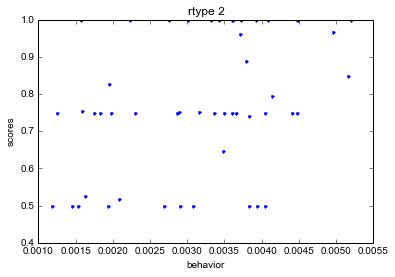

In [3]:
'''
Now let's look at proper RME with dropout
'''

def get_ranks(sorted_indices):
    ranks = np.zeros(sorted_indices.shape,dtype=np.int)
    for i in six.moves.range(sorted_indices.shape[0]):
        ranks[sorted_indices[i]] = i+1
    return ranks

data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runC.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runC.npz')

data31 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runA.npz')
data32 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runC.npz')

data41 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype2-trajectories400-runA.npz')
data42 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype2-trajectories400-runC.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runC.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runC.npz')

data71 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/rmeproper-rtype1-rollouts1000-trajectories100-runA.npz')
data72 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/rmeproper-rtype1-rollouts1000-trajectories100-runC.npz')

# each row is a real environment
raw_evals = np.vstack([data71['evals'],data72['evals']]).T
eval_ixs = np.arange(raw_evals.shape[0])

vloss = np.concatenate([data11['vloss'],data12['vloss']])[:,-1]
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0]])
behavior = np.concatenate([data41['rewards'][:,0],data42['rewards'][:,0]]) / 4.0
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts']])[:,0,:]

analyzeRME(raw_evals, eval_ixs, scores, vloss, behavior, initialq)